### **Agglomerative Clustering Notes**

Agglomerative Clustering is a bottom-up hierarchical clustering method. It begins with each data point as its own cluster and iteratively merges the closest clusters based on a distance metric. The process continues until all points are grouped into a single cluster or the desired number of clusters is achieved.

---

### **Agglomerative Clustering Algorithm**:

1. **Initialization**:  
   $$ \forall i, \ C_i = \{x_i\}, \ i = 1, 2, \dots, n $$  
   _Each data point is initially its own cluster._

2. **Distance Calculation**:  
   $$ D(C_i, C_j) $$  
   _The distance between two clusters $ C_i $ and $ C_j $ is calculated using a chosen distance metric (usually Euclidean)._

3. **Choose Linkage**:  
   - **Single Linkage**  
   - **Complete Linkage**  
   - **Average Linkage**  
   - **Ward’s Linkage**

4. **Cluster Merging**:  
   $$ (i, j) = \arg \min_{i \neq j} D(C_i, C_j) $$  
   $$ C_{\text{new}} = C_i \cup C_j $$  
   _The two clusters with the smallest distance are merged._

5. **Repeat**:  
   - Continue merging clusters until stopping criterion is met, which can be:
     - Achieving the desired number of clusters
     - Merging all points into one cluster

---

### **Types of Linkages**:

1. **Single Linkage**:
   $$ D_{\text{single}}(C_i, C_j) = \min_{p \in C_i, q \in C_j} \| p - q \|_2 $$  
   _The distance between two clusters is the minimum pairwise distance between their points._

2. **Complete Linkage**:
   $$ D_{\text{complete}}(C_i, C_j) = \max_{p \in C_i, q \in C_j} \| p - q \|_2 $$  
   _The distance between two clusters is the maximum pairwise distance between their points._

3. **Average Linkage**:
   $$ D_{\text{average}}(C_i, C_j) = \frac{1}{|C_i||C_j|} \sum_{p \in C_i, q \in C_j} \| p - q \|_2 $$  
   _The distance between two clusters is the average of the pairwise distances between their points._

4. **Ward’s Linkage**:
   $$ D_{\text{Ward}}(C_i, C_j) = \sqrt{\frac{|C_i| \cdot |C_j|}{|C_i| + |C_j|} \| \mu_{C_i} - \mu_{C_j} \|_2^2} $$  
   _The distance between two clusters is based on the squared Euclidean distance between their centroids, weighted by their sizes._

---

### **Advantages and Disadvantages**:

1. **Single Linkage**:
   - **Advantages**:  
     - Suitable for irregular-shaped clusters.
   - **Disadvantages**:  
     - Sensitive to outliers; may lead to "chaining" of distant clusters.

2. **Complete Linkage**:
   - **Advantages**:  
     - Produces compact, spherical clusters.
   - **Disadvantages**:  
     - Sensitive to outliers and may split large clusters.

3. **Average Linkage**:
   - **Advantages**:  
     - Provides a balanced approach to clustering.
   - **Disadvantages**:  
     - Less sensitive to irregular-shaped clusters.

4. **Ward’s Linkage**:
   - **Advantages**:  
     - Minimizes within-cluster variance, resulting in more compact clusters.
   - **Disadvantages**:  
     - Sensitive to large cluster sizes and may not work well with non-spherical clusters.



In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.datasets import make_blobs
from scipy.cluster.hierarchy import dendrogram, linkage

np.random.seed(47)
plt.style.use('dark_background')

# Generate synthetic data
X, y_true = make_blobs(
    n_samples=1000,
    centers=4,
    cluster_std=1.0,
    random_state=47
)

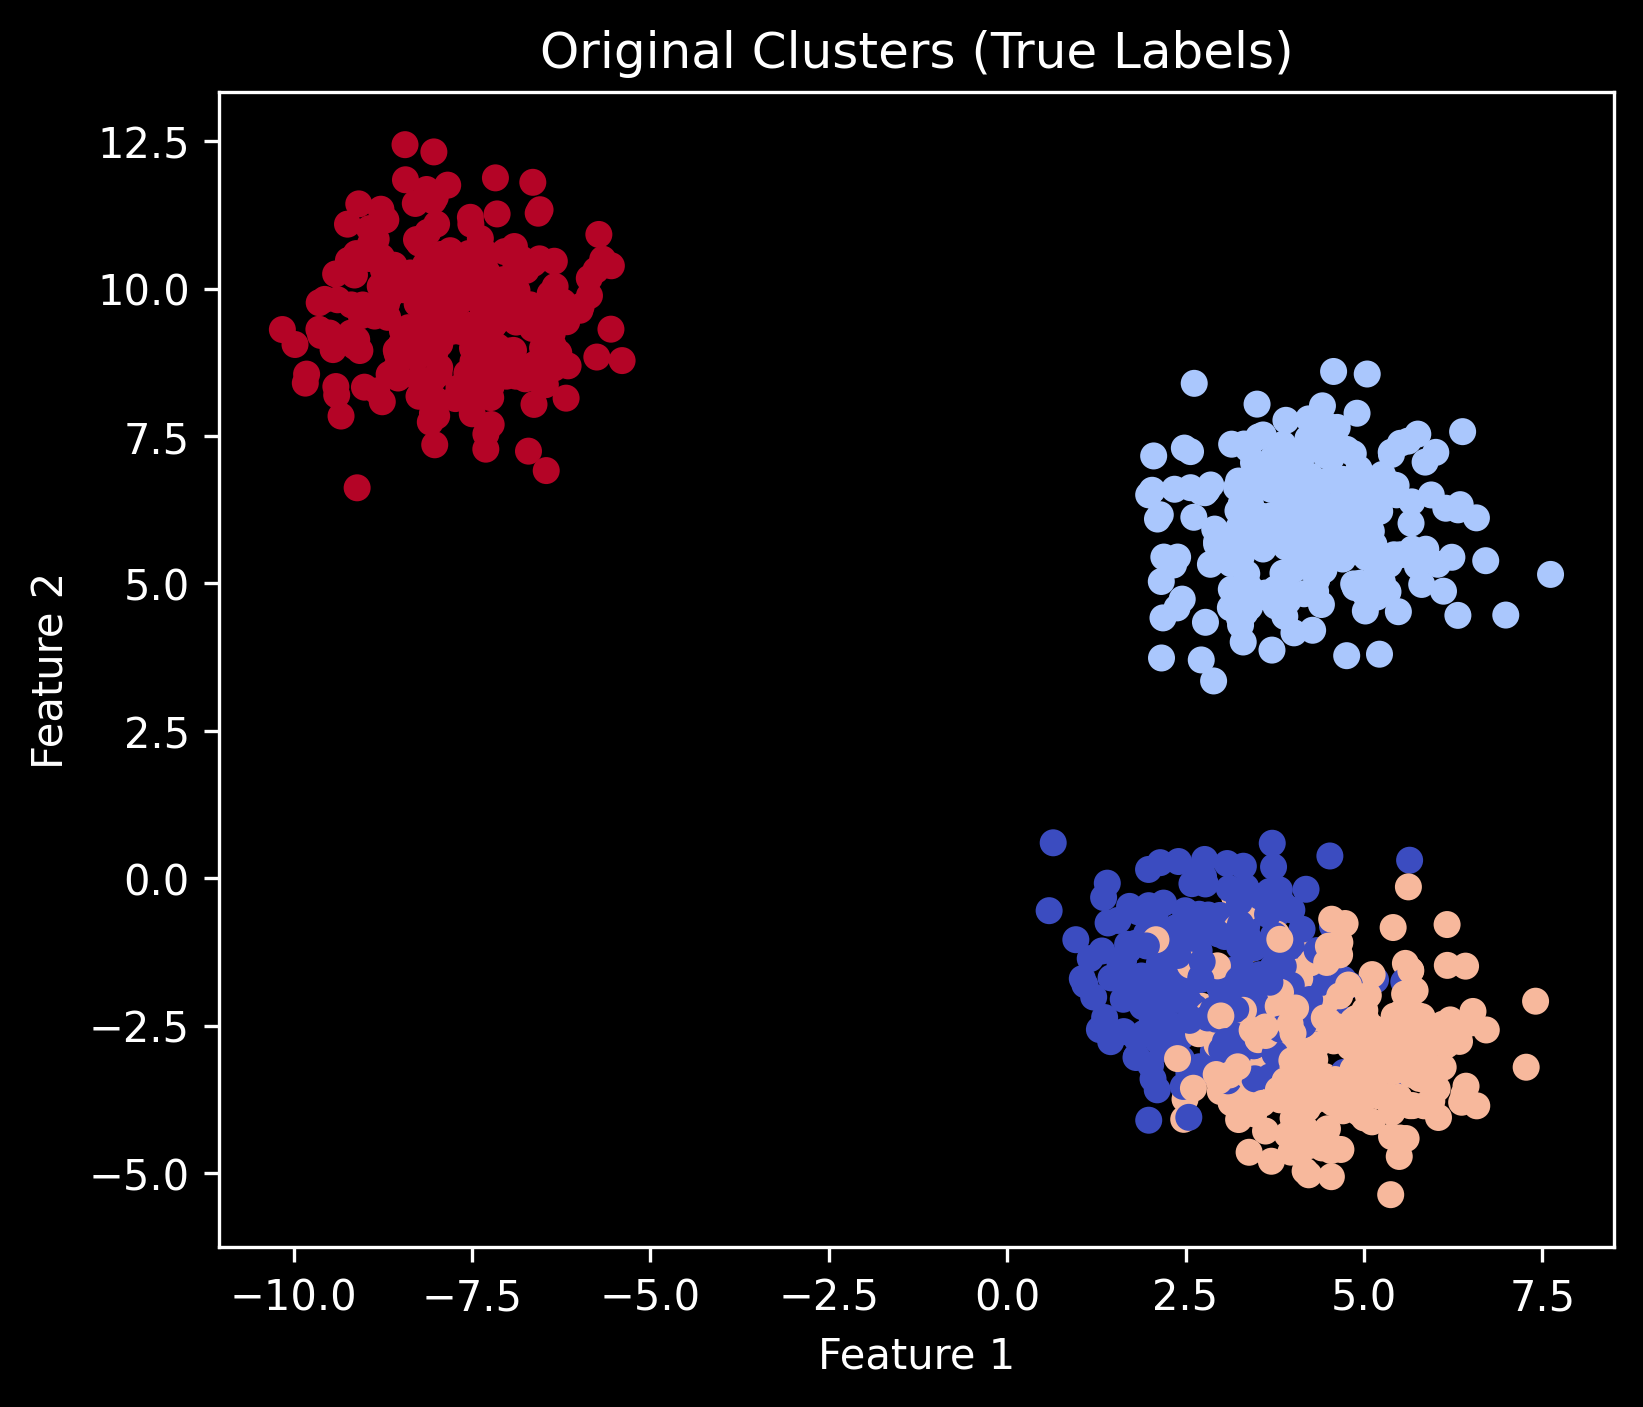

In [2]:
# Plot original clusters
plt.figure(figsize=(6, 5), dpi=300)
plt.scatter(X[:, 0], X[:, 1], c=y_true, cmap='coolwarm_r', s=30)
plt.title("Original Clusters (True Labels)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

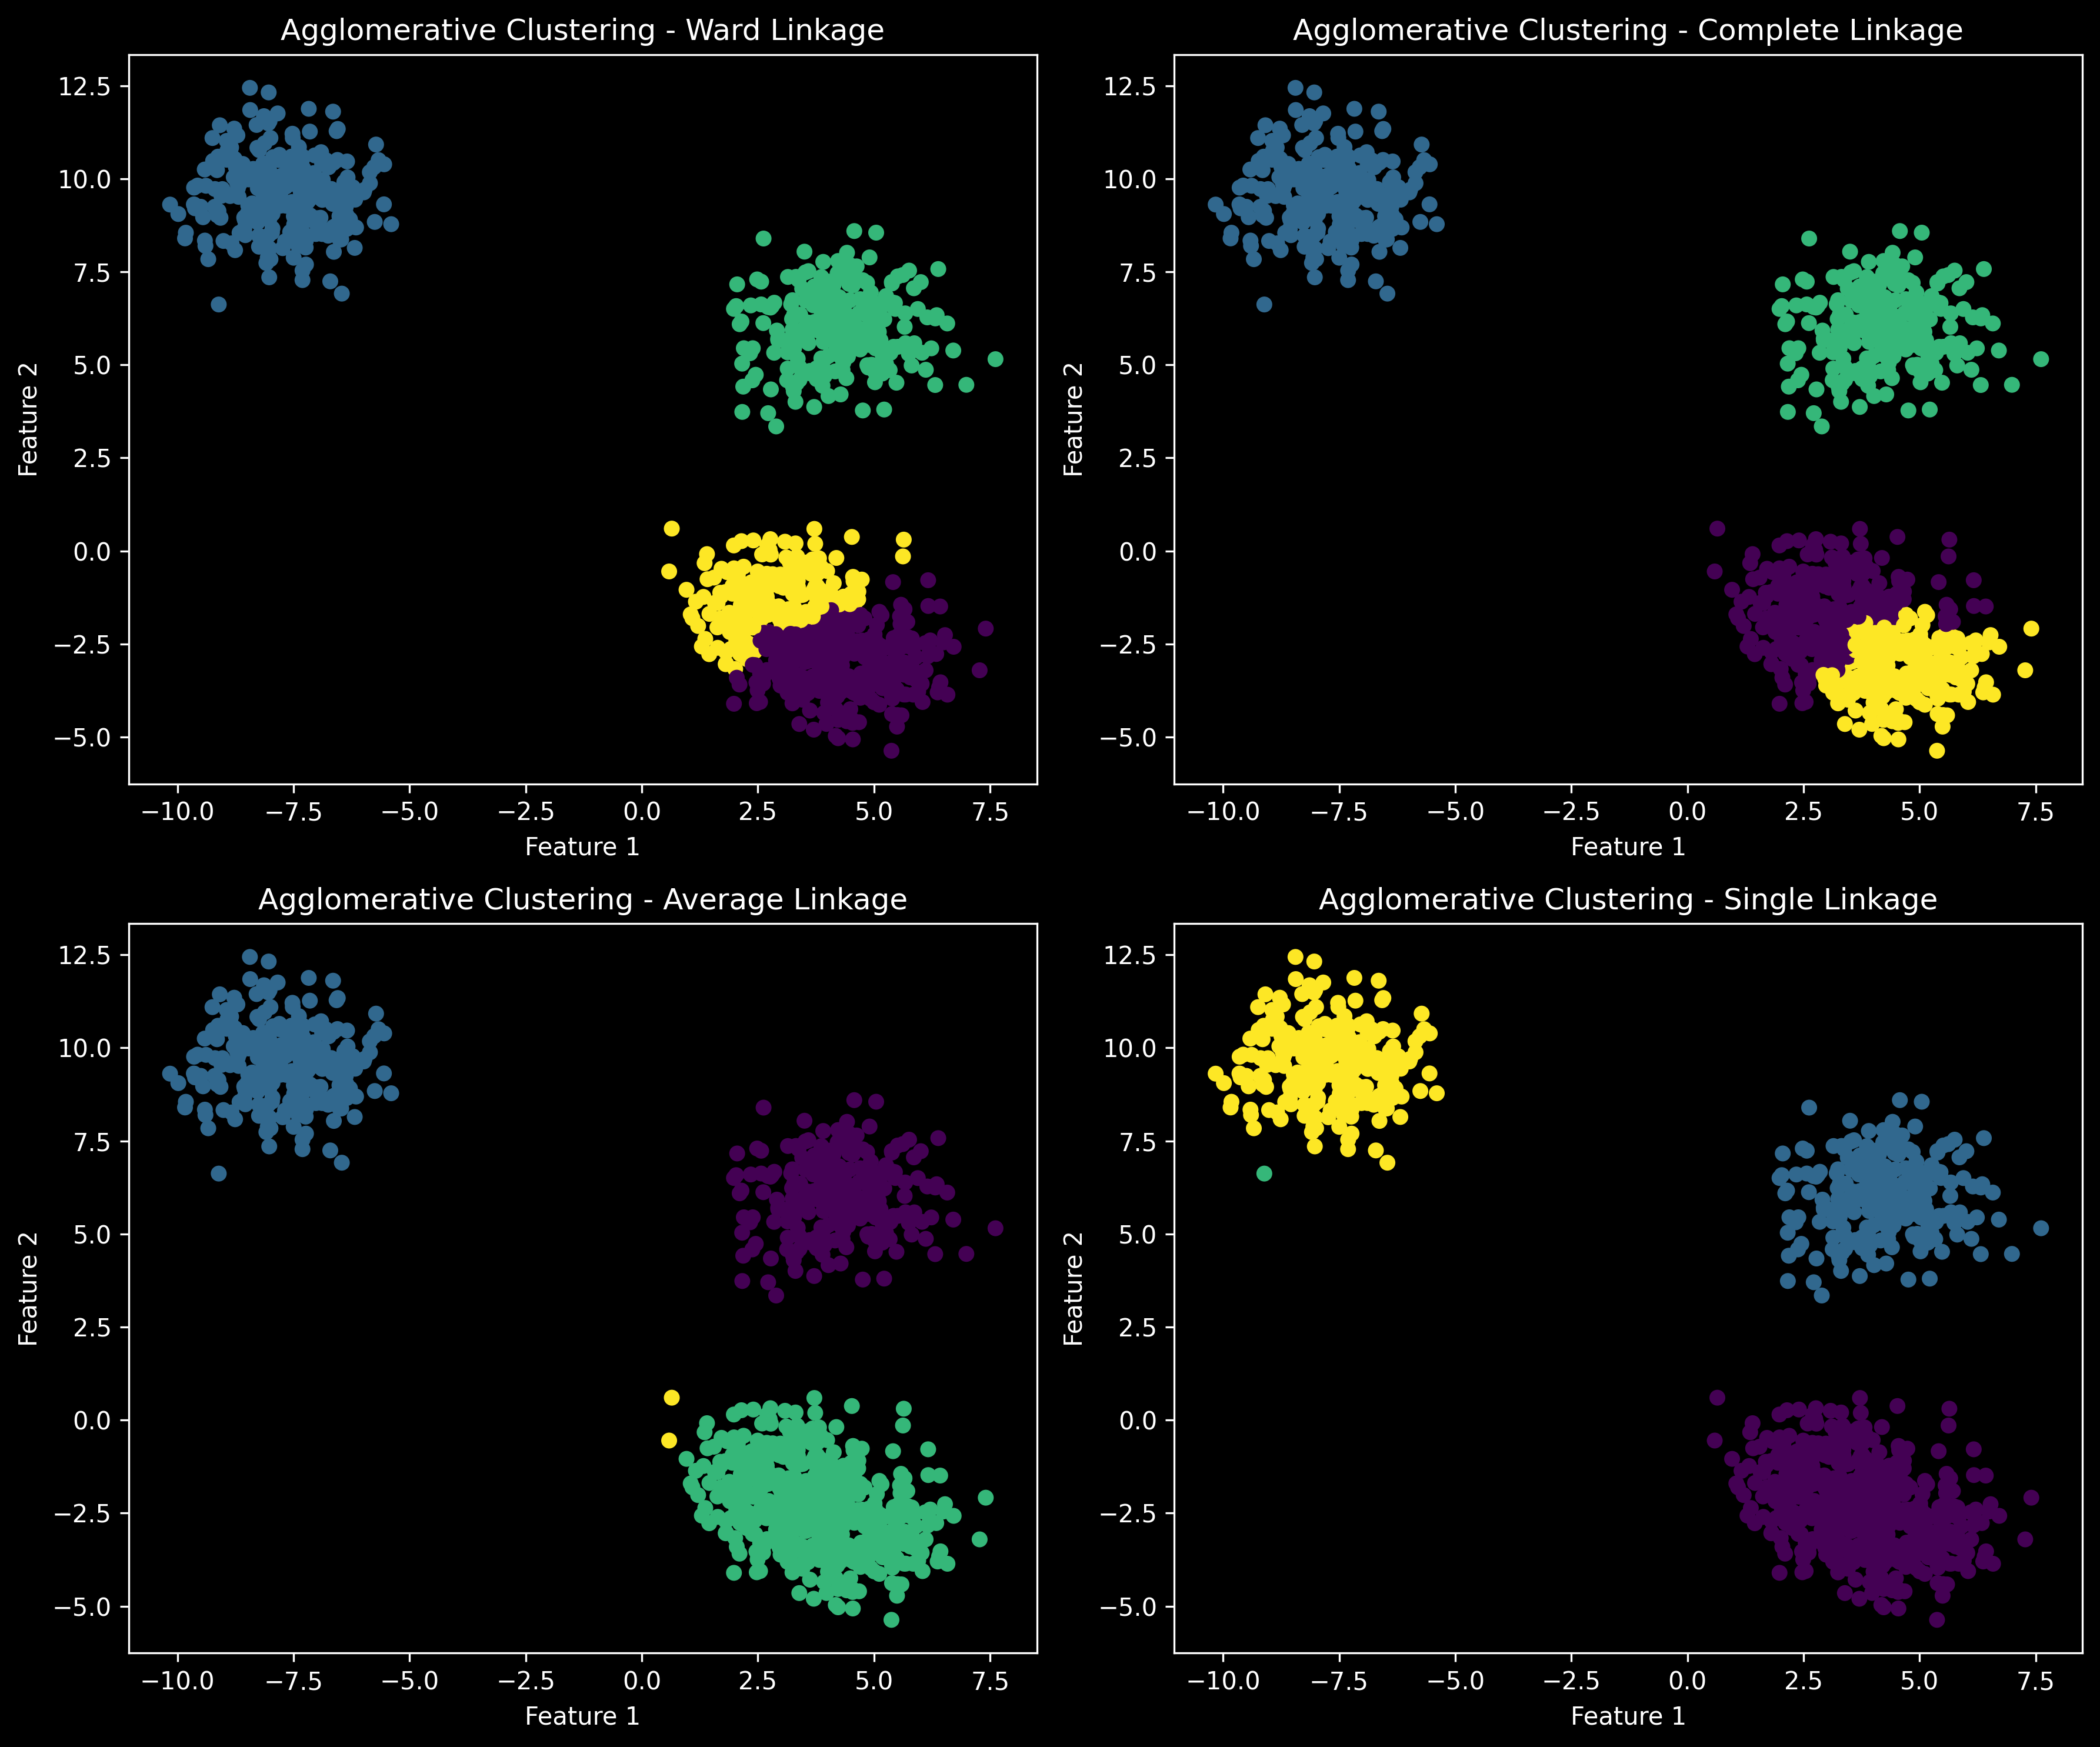

In [6]:
# Define linkage types
linkages = ['ward', 'complete', 'average', 'single']
cluster_results = {}

# Perform Agglomerative Clustering
plt.figure(figsize=(12, 10), dpi=300)
for i, linkage_type in enumerate(linkages):
    # Perform hierarchical clustering
    clustering = AgglomerativeClustering(n_clusters=4, linkage=linkage_type)
    cluster_labels = clustering.fit_predict(X)
    cluster_results[linkage_type] = cluster_labels
    
    # Plot clustering results
    plt.subplot(2, 2, i + 1)
    plt.scatter(X[:, 0], X[:, 1], c=cluster_labels, cmap='viridis', s=30)
    plt.title(f"Agglomerative Clustering - {linkage_type.capitalize()} Linkage")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
plt.tight_layout()
plt.savefig('clustering_methods.png', dpi=300)
plt.show()

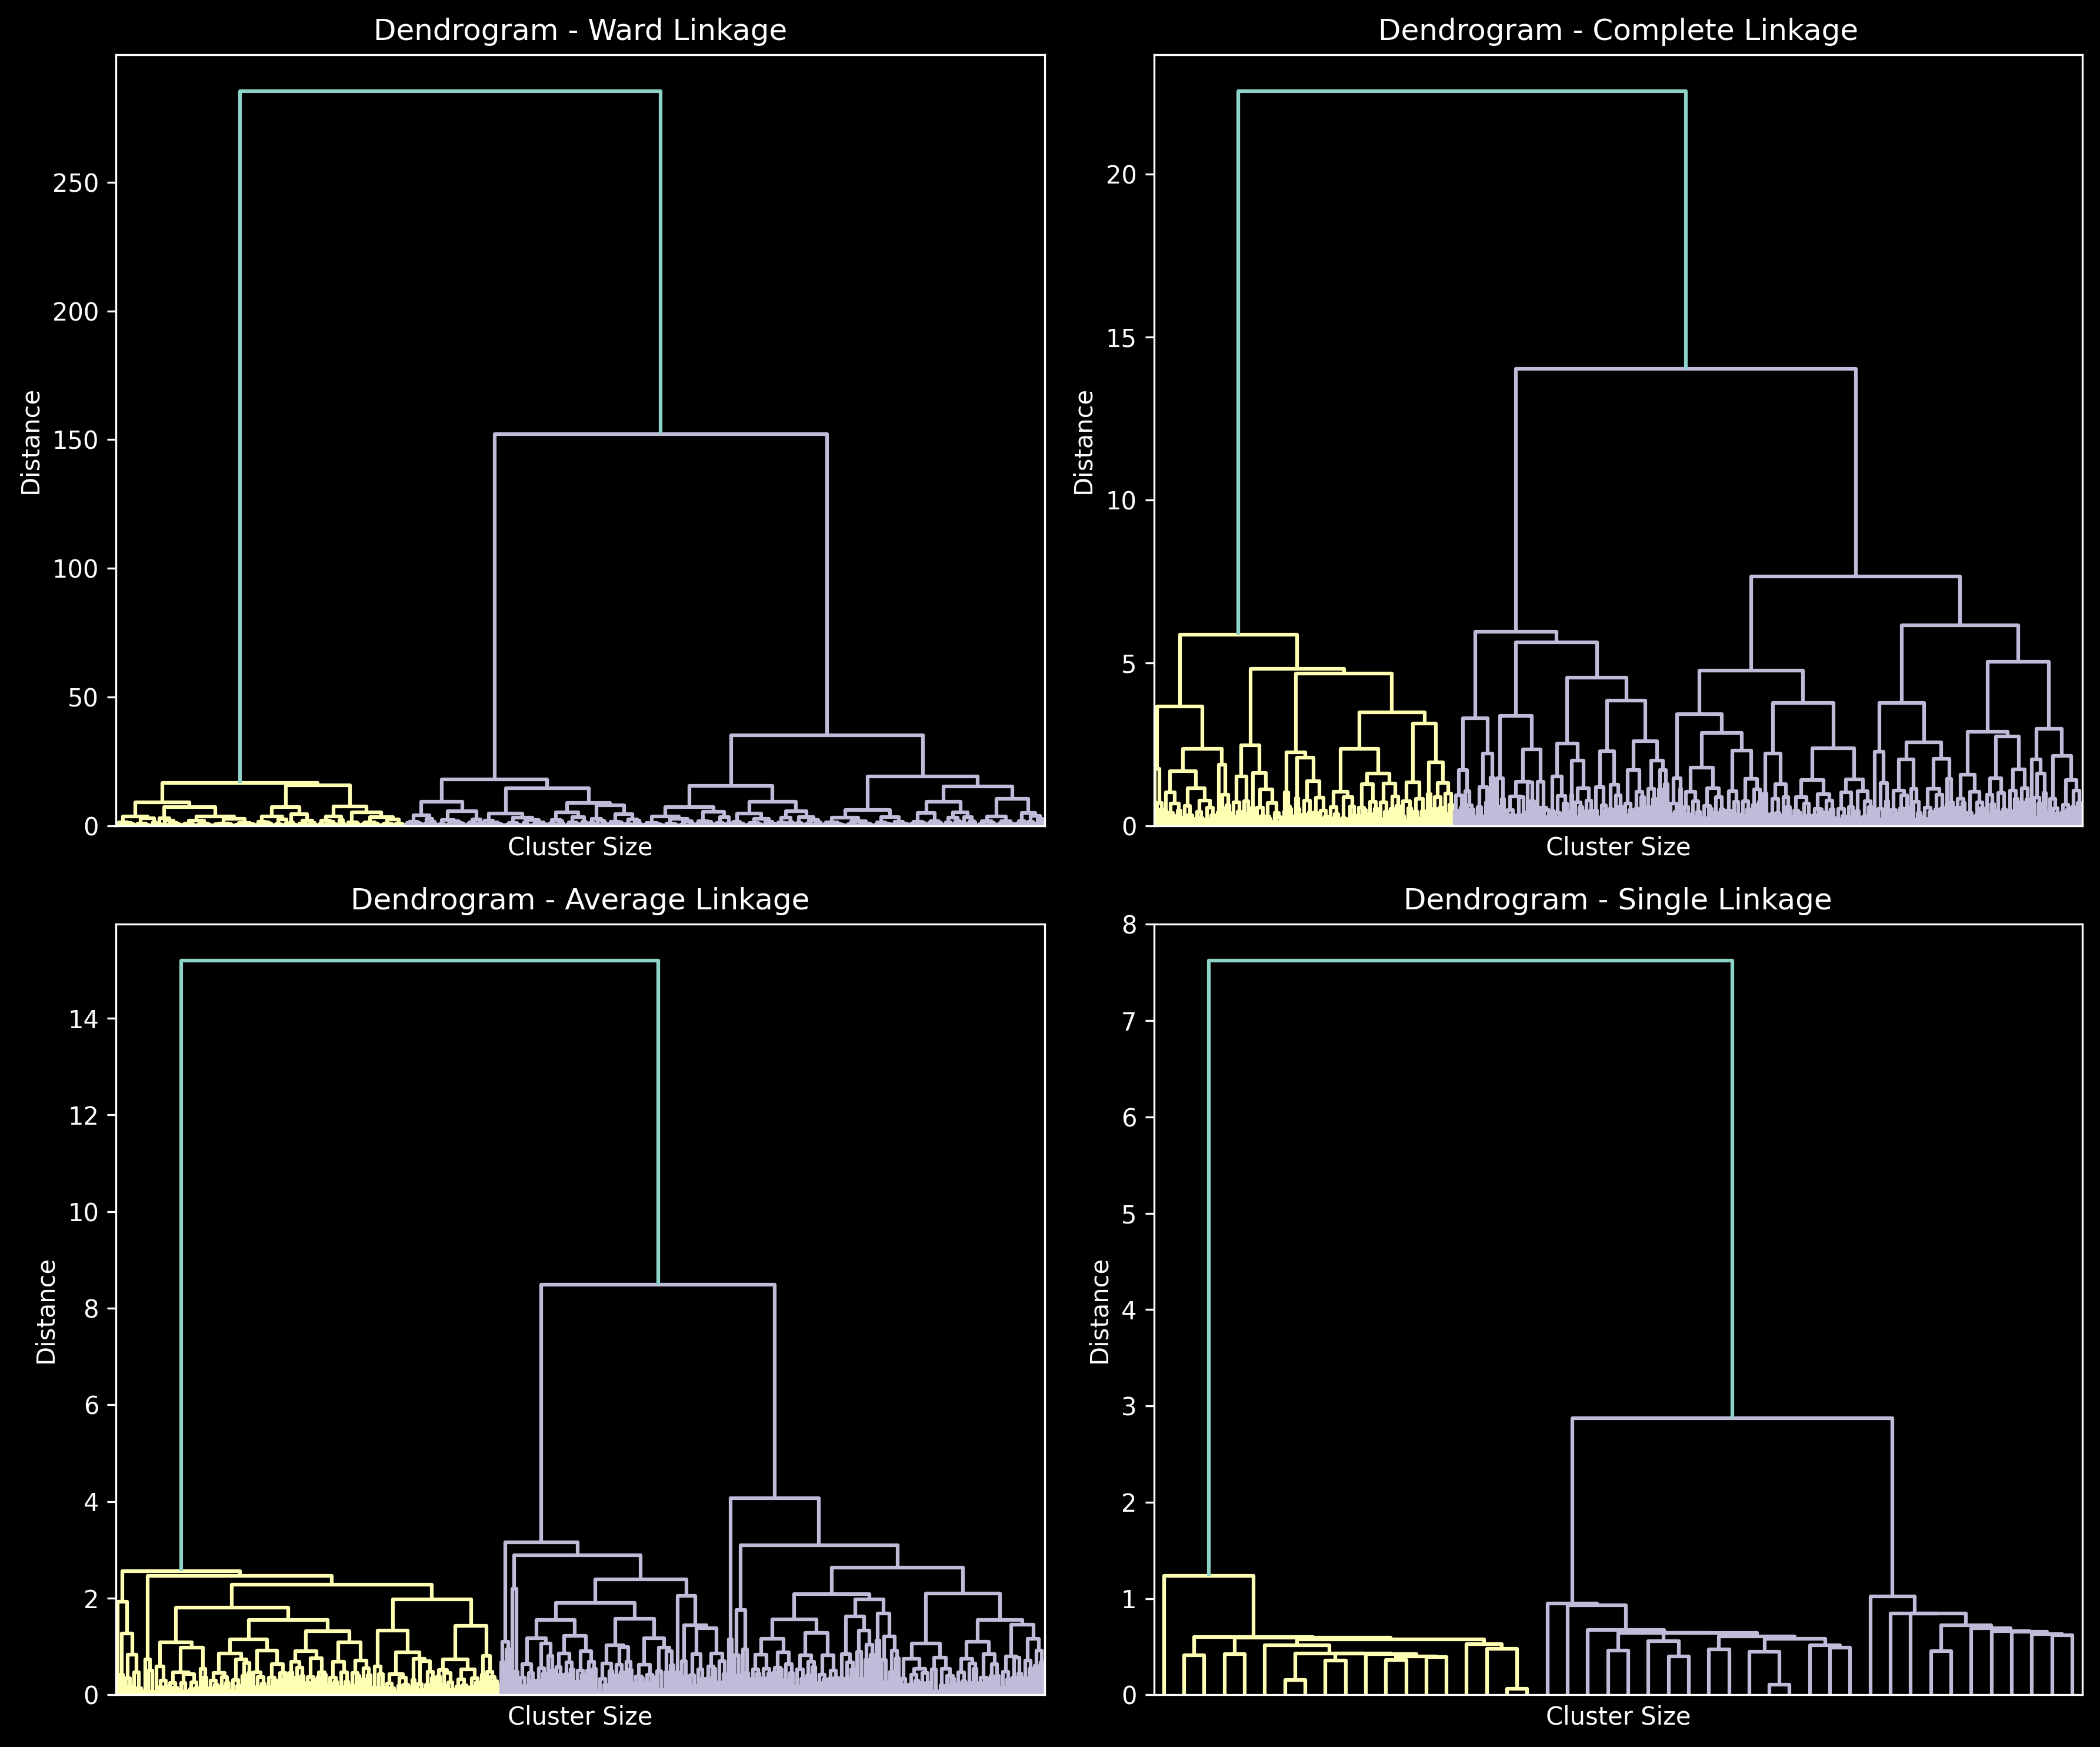

In [7]:
# Plot dendrograms for hierarchical clustering
plt.figure(figsize=(12, 10), dpi=300)
for i, linkage_type in enumerate(linkages):
    # Compute linkage matrix
    linkage_matrix = linkage(X, method=linkage_type)
    
    # Plot dendrogram
    plt.subplot(2, 2, i + 1)
    dendrogram(linkage_matrix, truncate_mode='level', p=10, no_labels=True)
    plt.title(f"Dendrogram - {linkage_type.capitalize()} Linkage")
    plt.xlabel("Cluster Size")
    plt.ylabel("Distance")
plt.tight_layout()
plt.savefig('dendrograms.png')
plt.show()